Successfully parsed sequence.gb

=== BASIC INFORMATION ===
Accession: NM_005994.4
Description: Homo sapiens T-box transcription factor 2 (TBX2), mRNA
Organism: Homo sapiens
Sequence length: 3433 bp
GC content: 66.06%
Taxonomy: ['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo']
Date: 04-APR-2024
Data file division: PRI

=== REFERENCES ===

Reference 1:
  Title: T-box transcription factor 2 mediates antitumor immune response in cutaneous squamous cell carcinoma by regulating the expression of programmed death ligand 1
  Authors: Wang,X., Li,Z. and Sun,Y.
  Journal: Skin Res Technol 29 (1), e13254 (2023)
  PubMed ID: 36478592

Reference 2:
  Title: A 3-Gene Random Forest Model to Diagnose Non-obstructive Azoospermia Based on Transcription Factor-Related Henes
  Authors: Zhou,R., Liang,J., Chen,Q., Tian,H., Yang,C. and Liu,C.
  Journal: Reprod Sci 30 (1), 23

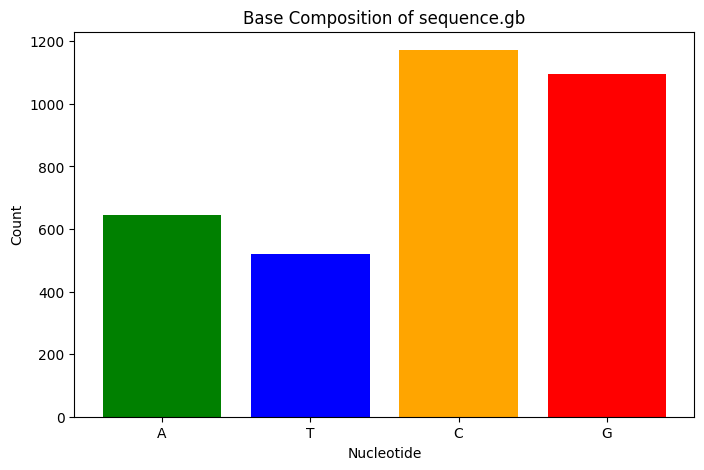


=== CDS DETAILS ===
Location: [334:2473](+)
Strand: +
Protein ID: NP_005985.3
Product: T-box transcription factor TBX2

Protein sequence (first 50 aa): MREPALAASAMAYHPFHAPRPADFPMSAFLAAAQPSFFPALALPPGALAK...
Protein length: 712 amino acids

=== EXON STRUCTURE ===
Exon 1: [0:729](+) (Length: 729 bp)
Exon 2: [729:997](+) (Length: 268 bp)
Exon 3: [997:1144](+) (Length: 147 bp)
Exon 4: [1144:1221](+) (Length: 77 bp)
Exon 5: [1221:1385](+) (Length: 164 bp)
Exon 6: [1385:2020](+) (Length: 635 bp)
Exon 7: [2020:3433](+) (Length: 1413 bp)


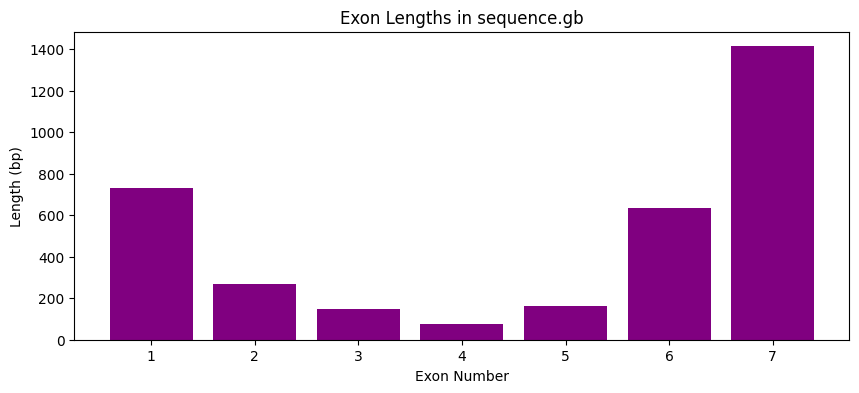


=== REGULATORY ELEMENTS ===
Type: polyA_signal_sequence
Location: [3066:3072](+)
Note: hexamer: AATAAA

Type: polyA_signal_sequence
Location: [3412:3418](+)
Note: hexamer: AATAAA


Analysis complete. Report saved to 'sequence_analysis_report.txt'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
#!/usr/bin/env python
# coding: utf-8

# # TBX2 Gene Analysis (NM_005994) - sequence.gb

from Bio import SeqIO
from Bio.SeqUtils import gc_fraction
import matplotlib.pyplot as plt
import pandas as pd

# File name (already known)
filename = "sequence.gb"

# Parse the GenBank file
try:
    record = SeqIO.read(filename, "genbank")
    print(f"Successfully parsed {filename}")
except FileNotFoundError:
    print(f"Error: File {filename} not found. Please upload it first.")
    from google.colab import files
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    record = SeqIO.read(filename, "genbank")

## 1. Basic Information Extraction
print("\n=== BASIC INFORMATION ===")
print(f"Accession: {record.id}")
print(f"Description: {record.description}")
print(f"Organism: {record.annotations['organism']}")
print(f"Sequence length: {len(record)} bp")
print(f"GC content: {gc_fraction(record.seq)*100:.2f}%")
print(f"Taxonomy: {record.annotations['taxonomy']}")
print(f"Date: {record.annotations['date']}")
print(f"Data file division: {record.annotations['data_file_division']}")

# Extract references
print("\n=== REFERENCES ===")
for i, ref in enumerate(record.annotations['references'], 1):
    print(f"\nReference {i}:")
    print(f"  Title: {ref.title}")
    print(f"  Authors: {ref.authors}")
    print(f"  Journal: {ref.journal}")
    if ref.pubmed_id: print(f"  PubMed ID: {ref.pubmed_id}")

## 2. Feature Analysis
print("\n=== FEATURE ANALYSIS ===")
features = {
    'gene': 0,
    'exon': 0,
    'CDS': 0,
    'regulatory': 0,
    'misc_feature': 0,
    'other': 0
}

feature_details = []
for feature in record.features:
    if feature.type in features:
        features[feature.type] += 1
    else:
        features['other'] += 1

    # Collect detailed information about important features
    if feature.type in ['CDS', 'gene', 'exon', 'regulatory']:
        qualifiers = feature.qualifiers
        detail = {
            'type': feature.type,
            'location': str(feature.location),
            'strand': feature.location.strand
        }
        if 'gene' in qualifiers:
            detail['gene'] = qualifiers['gene'][0]
        if 'product' in qualifiers:
            detail['product'] = qualifiers['product'][0]
        if 'note' in qualifiers:
            detail['note'] = qualifiers['note'][0]
        feature_details.append(detail)

print("\nFeature counts:")
for k, v in features.items():
    print(f"{k}: {v}")

# Create a DataFrame for feature details
feature_df = pd.DataFrame(feature_details)
print("\nDetailed feature information:")
print(feature_df)

## 3. Sequence Composition Analysis
print("\n=== SEQUENCE COMPOSITION ===")
def count_bases(seq):
    counts = {'A':0, 'T':0, 'C':0, 'G':0}
    for base in seq:
        if base in counts:
            counts[base] += 1
    return counts

base_counts = count_bases(record.seq)
print("Base counts:")
for base, count in base_counts.items():
    print(f"{base}: {count} ({count/len(record.seq)*100:.2f}%)")

# Plot base composition
plt.figure(figsize=(8,5))
plt.bar(base_counts.keys(), base_counts.values(), color=['green', 'blue', 'orange', 'red'])
plt.title("Base Composition of sequence.gb")
plt.ylabel("Count")
plt.xlabel("Nucleotide")
plt.show()

## 4. CDS Analysis
cds_features = [f for f in record.features if f.type == 'CDS']
if cds_features:
    cds = cds_features[0]
    print("\n=== CDS DETAILS ===")
    print(f"Location: {cds.location}")
    print(f"Strand: {'+' if cds.location.strand == 1 else '-'}")
    print(f"Protein ID: {cds.qualifiers['protein_id'][0]}")
    print(f"Product: {cds.qualifiers['product'][0]}")

    # Extract translation
    if 'translation' in cds.qualifiers:
        translation = cds.qualifiers['translation'][0]
        print(f"\nProtein sequence (first 50 aa): {translation[:50]}...")
        print(f"Protein length: {len(translation)} amino acids")

## 5. Exon-Intron Structure
exons = [f for f in record.features if f.type == 'exon']
if exons:
    print("\n=== EXON STRUCTURE ===")
    exon_lengths = []
    for i, exon in enumerate(exons, 1):
        length = len(exon.location)
        exon_lengths.append(length)
        print(f"Exon {i}: {exon.location} (Length: {length} bp)")

    # Plot exon lengths
    plt.figure(figsize=(10,4))
    plt.bar(range(1, len(exon_lengths)+1), exon_lengths, color='purple')
    plt.title("Exon Lengths in sequence.gb")
    plt.xlabel("Exon Number")
    plt.ylabel("Length (bp)")
    plt.xticks(range(1, len(exon_lengths)+1))
    plt.show()

## 6. Regulatory Elements
regulatory = [f for f in record.features if f.type == 'regulatory']
if regulatory:
    print("\n=== REGULATORY ELEMENTS ===")
    for reg in regulatory:
        print(f"Type: {reg.qualifiers['regulatory_class'][0]}")
        print(f"Location: {reg.location}")
        if 'note' in reg.qualifiers:
            print(f"Note: {reg.qualifiers['note'][0]}")
        print()

## 7. Save Analysis Results to File
report_filename = "sequence_analysis_report.txt"
with open(report_filename, "w") as report:
    report.write(f"Gene Analysis Report for {filename}\n")
    report.write("="*50 + "\n\n")
    report.write(f"Accession: {record.id}\n")
    report.write(f"Description: {record.description}\n")
    report.write(f"Sequence length: {len(record)} bp\n")
    report.write(f"GC content: {gc_fraction(record.seq)*100:.2f}%\n\n")

    report.write("=== FEATURE COUNTS ===\n")
    for k, v in features.items():
        report.write(f"{k}: {v}\n")

    report.write("\n=== CDS DETAILS ===\n")
    if cds_features:
        report.write(f"Protein ID: {cds.qualifiers['protein_id'][0]}\n")
        report.write(f"Product: {cds.qualifiers['product'][0]}\n")
        report.write(f"Location: {cds.location}\n")

    report.write("\n=== REFERENCES ===\n")
    for i, ref in enumerate(record.annotations['references'], 1):
        report.write(f"\nReference {i}:\n")
        report.write(f"  Title: {ref.title}\n")
        report.write(f"  Authors: {ref.authors}\n")
        report.write(f"  Journal: {ref.journal}\n")
        if ref.pubmed_id: report.write(f"  PubMed ID: {ref.pubmed_id}\n")

print(f"\nAnalysis complete. Report saved to '{report_filename}'")

# Provide download link for the report
from google.colab import files
files.download(report_filename)

# **What This Script Does:**
**Basic Information Extraction:**

- Extracts accession number, description, organism, sequence length, GC content, taxonomy, and date

- Lists all references with titles, authors, and PubMed IDs

**Feature Analysis:**

- Counts different types of features (genes, exons, CDS, regulatory elements)

- Provides detailed information about important features

**Sequence Composition:**

Calculates base counts and percentages

Creates a visualization of base composition

**CDS Analysis:**

Extracts coding sequence details including location, strand, protein ID

Shows the translated protein sequence (first 50 amino acids)

**Exon-Intron Structure:**

Lists all exons with their locations and lengths

Creates a bar plot of exon lengths

**Regulatory Elements:**

Identifies and describes regulatory elements like polyA signals

**Report Generation:**

Saves all analysis results to a text file